**Import packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

**Read data**

In [35]:
# Training data
train_all = pd.read_csv("datasets/TRAIN.csv")
train_embedding = pd.read_csv("datasets/384EMBEDDINGS_TRAIN.csv") 
train_tfidf = pd.read_csv("datasets/TFIDF_TRAIN.csv")

# Validation data
validation_all = pd.read_csv("datasets/VALIDATION.csv")
validation_embedding = pd.read_csv("datasets/384EMBEDDINGS_VALIDATION.csv") 
validation_tfidf = pd.read_csv("datasets/TFIDF_VALIDATION.csv")

# Testing data
test_all = pd.read_csv("datasets/TEST_NO_LABELS.csv") 
test_embedding = pd.read_csv("datasets/384EMBEDDINGS_TEST.csv") 
test_tfidf = pd.read_csv("datasets/TFIDF_TEST.csv")

# TFIDF data vocabulary
vocabulary_tfidf = pd.read_csv("datasets/tfidf_words.txt")

# Remove redundant column
train_tfidf.drop(columns=['Unnamed: 0'], inplace=True) 
train_embedding.drop(columns=['Unnamed: 0'],inplace=True) 
validation_tfidf.drop(columns=['Unnamed: 0'],inplace=True)
validation_embedding.drop(columns=['Unnamed: 0'],inplace=True) 
test_embedding.drop(columns=['Unnamed: 0'],inplace=True)
test_tfidf.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
# 看看是不是这些词汇真的有用 数字无用， 有些有用，可能500个都多了，因为有些没必要用，我们就可以做feature selection - discussion
vocabulary_tfidf[:20]

,0,10
0,1,100
1,2,15
2,3,20
3,4,30
4,5,63
5,6,able
6,7,absolutely
7,8,actually
8,9,advice
9,10,ago


**Data processing**

In [4]:
# Extract the rating section
train_rating = train_all.rating 
validation_rating = validation_all.rating

# 没用到
# Convert the TFIDF scores into binary values （ Bag of words ）
train_words_tfidf = np.ceil(train_tfidf)
validation_words_tfidf = np.ceil(validation_tfidf)
test_words_tfidf = np.ceil(test_tfidf)

# 没用到
# Merge TFIDF and word embeddings datasets
train_merge = np.concatenate((train_tfidf,train_embedding),axis = 1)
validation_merge = np.concatenate((validation_tfidf,validation_embedding),axis = 1)
test_merge= np.concatenate((test_tfidf,test_embedding),axis = 1)

**Bar charts for training and validation rating data**

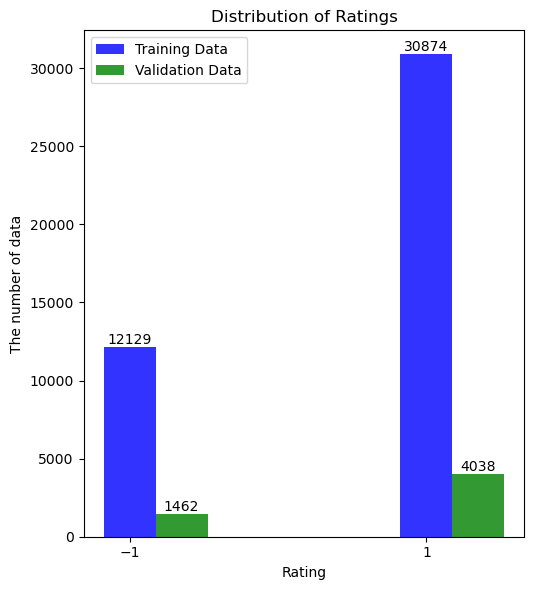

In [5]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
ratings = [-1, 1]
train_counts = train_rating.value_counts().loc[ratings]
validation_counts = validation_rating.value_counts().loc[ratings]

bar_width = 0.35
opacity = 0.8

# The bars for training data
train_bars = plt.bar(ratings, train_counts, bar_width, alpha=opacity, color='b', label='Training Data')

# The bars for validation data
validation_bars = plt.bar(np.array(ratings) + bar_width, validation_counts, bar_width, alpha=opacity, color='g', label='Validation Data')

for bars in [train_bars, validation_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height}", ha='center', va='bottom')


plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("The number of data")
plt.xticks([-1, 1]) 
plt.legend()

plt.tight_layout()
plt.show()


**Classifers Accuracy - word embeddings**

In [6]:
# oneR Classifier - Baseline
oneR_model_embedding = DecisionTreeClassifier(max_depth = 1)
oneR_model_embedding.fit(train_embedding,train_rating)
oneR_acc_embedding = oneR_model_embedding.score(validation_embedding, validation_rating) 
print('One R accuracy:', oneR_acc_embedding)

# Decision tree Classifer - Model 1
DT_model_embedding = DecisionTreeClassifier(max_depth = None)
DT_model_embedding.fit(train_embedding,train_rating)
DT_acc_embedding = DT_model_embedding.score(validation_embedding, validation_rating) 
print('Decision tree accuracy:', DT_acc_embedding)

# Bagging Classifier - Model 2
bagging_model_embedding = BaggingClassifier(estimator = DT_model_embedding, n_estimators = 10, random_state = 42)
bagging_model_embedding.fit(train_embedding,train_rating)
bagging_acc_embedding = bagging_model_embedding.score(validation_embedding, validation_rating) 
print('Bagging accuracy:', bagging_acc_embedding)

One R accuracy: 0.746
Decision tree accuracy: 0.8098181818181818
Bagging accuracy: 0.8645454545454545


**Classifers Accuracy - TFIDF**

In [7]:
# oneR Classifier - Baseline
oneR_model_tfidf = DecisionTreeClassifier(max_depth = 1)
oneR_model_tfidf.fit(train_tfidf,train_rating)
oneR_acc_tfidf = oneR_model_tfidf.score(validation_tfidf, validation_rating) 
print('One R accuracy:', oneR_acc_tfidf)

# Decision tree Classifer - Model 1
DT_model_tfidf = DecisionTreeClassifier(max_depth = None)
DT_model_tfidf.fit(train_tfidf,train_rating)
DT_acc_tfidf = DT_model_tfidf.score(validation_tfidf, validation_rating) 
print('Decision tree accuracy:', DT_acc_tfidf)

# Bagging Classifier - Model 2
bagging_model_tfidf = BaggingClassifier(estimator = DT_model_tfidf, n_estimators = 10, random_state = 42)
bagging_model_tfidf.fit(train_tfidf,train_rating)
bagging_acc_tfidf = bagging_model_tfidf.score(validation_tfidf, validation_rating) 
print('Bagging accuracy:', bagging_acc_tfidf)

One R accuracy: 0.7652727272727273
Decision tree accuracy: 0.8383636363636363
Bagging accuracy: 0.8723636363636363


**Classifiers evaluation - words embedding**

In [8]:
oneR_pred_embedding = oneR_model_embedding.predict(validation_embedding) 
oneR_precision_embedding, oneR_recall_embedding, oneR_f1score_embedding, _ = precision_recall_fscore_support(validation_rating, oneR_pred_embedding, average='macro')

DT_pred_embedding = DT_model_embedding.predict(validation_embedding) 
DT_precision_embedding, DT_recall_embedding, DT_f1score_embedding, _ = precision_recall_fscore_support(validation_rating, DT_pred_embedding, average='macro')

bagging_pred_embedding = bagging_model_embedding.predict(validation_embedding) 
bagging_precision_embedding, bagging_recall_embedding, bagging_f1score_embedding, _ = precision_recall_fscore_support(validation_rating, bagging_pred_embedding, average='macro')

# Print the results
print(f'One R          | Precision: {oneR_precision_embedding:.5f} | ',f'Recall: {oneR_recall_embedding:.5f} | ',f'F1-score: {oneR_f1score_embedding:.5f}')
print(f'Decision tree  | Precision: {DT_precision_embedding:.5f} | ',f'Recall: {DT_recall_embedding:.5f} | ',f'F1-score: {DT_f1score_embedding:.5f}')
print(f'Bagging        | Precision: {bagging_precision_embedding:.5f} | ',f'Recall: {bagging_recall_embedding:.5f} | ',f'F1-score: {bagging_f1score_embedding:.5f}')


One R          | Precision: 0.69044 |  Recall: 0.71880 |  F1-score: 0.69912
Decision tree  | Precision: 0.75647 |  Recall: 0.75376 |  F1-score: 0.75509
Bagging        | Precision: 0.82781 |  Recall: 0.82245 |  F1-score: 0.82506


**Classifiers evaluation - TFIDF**

In [9]:
oneR_pred_tfidf = oneR_model_tfidf.predict(validation_tfidf) 
oneR_precision_tfidf, oneR_recall_tfidf, oneR_f1score_tfidf, _ = precision_recall_fscore_support(validation_rating, oneR_pred_tfidf, average='macro')

DT_pred_tfidf = DT_model_tfidf.predict(validation_tfidf) 
DT_precision_tfidf, DT_recall_tfidf, DT_f1score_tfidf, _ = precision_recall_fscore_support(validation_rating, DT_pred_tfidf, average='macro')

bagging_pred_tfidf = bagging_model_tfidf.predict(validation_tfidf) 
bagging_precision_tfidf, bagging_recall_tfidf, bagging_f1score_tfidf, _ = precision_recall_fscore_support(validation_rating, bagging_pred_tfidf, average='macro')

# Print the results
print(f'One R          | Precision: {oneR_precision_tfidf:.5f} | ',f'Recall: {oneR_recall_tfidf:.5f} | ',f'F1-score: {oneR_f1score_tfidf:.5f}')
print(f'Decision tree  | Precision: {DT_precision_tfidf:.5f} | ',f'Recall: {DT_recall_tfidf:.5f} | ',f'F1-score: {DT_f1score_tfidf:.5f}')
print(f'Bagging        | Precision: {bagging_precision_tfidf:.5f} | ',f'Recall: {bagging_recall_tfidf:.5f} | ',f'F1-score: {bagging_f1score_tfidf:.5f}')

One R          | Precision: 0.77971 |  Recall: 0.57135 |  F1-score: 0.56156
Decision tree  | Precision: 0.79146 |  Recall: 0.80636 |  F1-score: 0.79823
Bagging        | Precision: 0.83267 |  Recall: 0.85111 |  F1-score: 0.84102


**Classifier confusion - word embeddings**

Text(0.5, 0.98, 'Confusion Matrix - Bagging (word embeddings)')

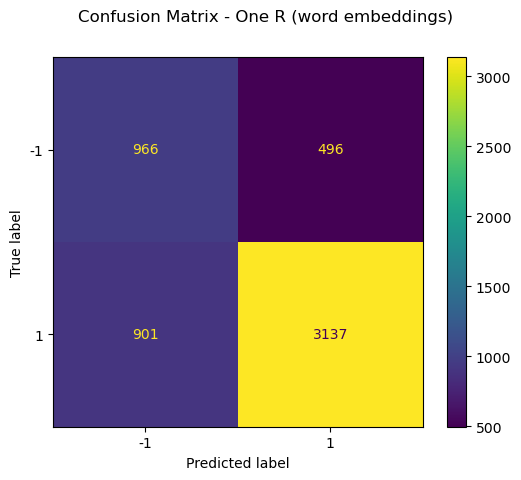

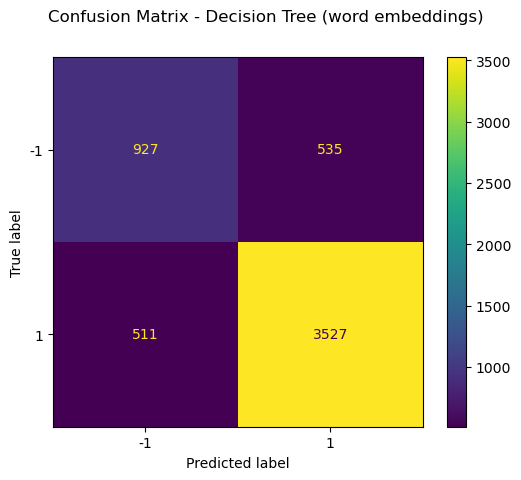

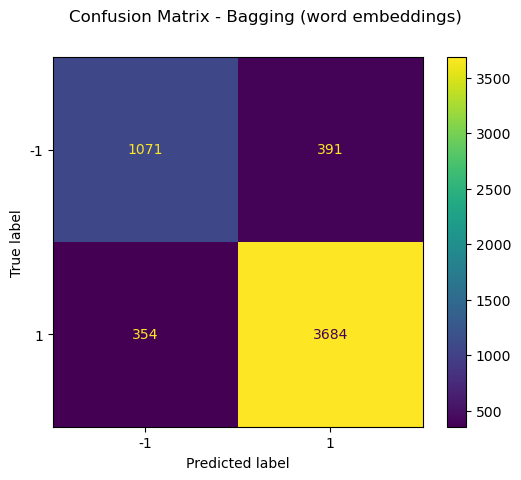

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay 

ConfusionMatrixDisplay.from_predictions(validation_rating, oneR_pred_embedding).figure_.suptitle(f'Confusion Matrix - One R (word embeddings)')
ConfusionMatrixDisplay.from_predictions(validation_rating, DT_pred_embedding).figure_.suptitle(f'Confusion Matrix - Decision Tree (word embeddings)')
ConfusionMatrixDisplay.from_predictions(validation_rating, bagging_pred_embedding).figure_.suptitle(f'Confusion Matrix - Bagging (word embeddings)')

**Classifier confusion - TFIDF**

Text(0.5, 0.98, 'Confusion Matrix - Bagging (TFIDF dataset)')

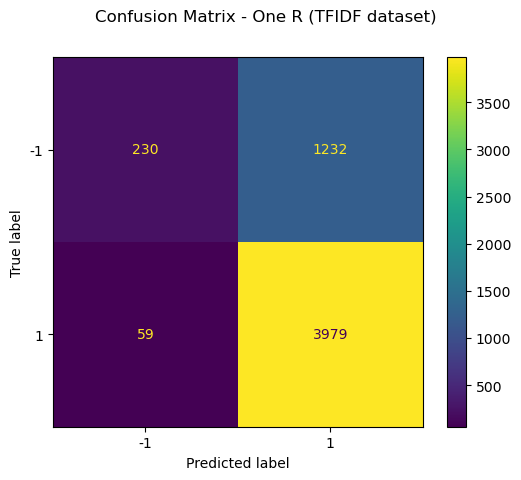

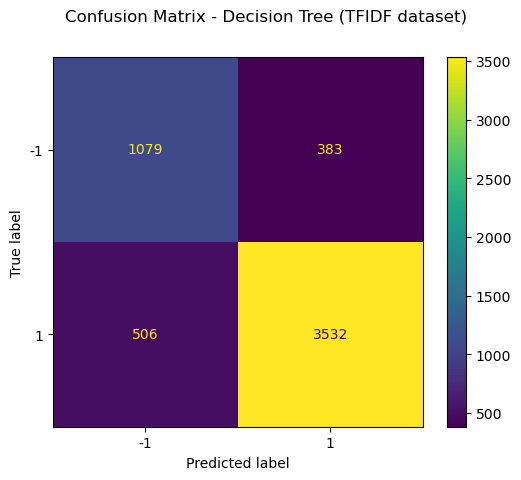

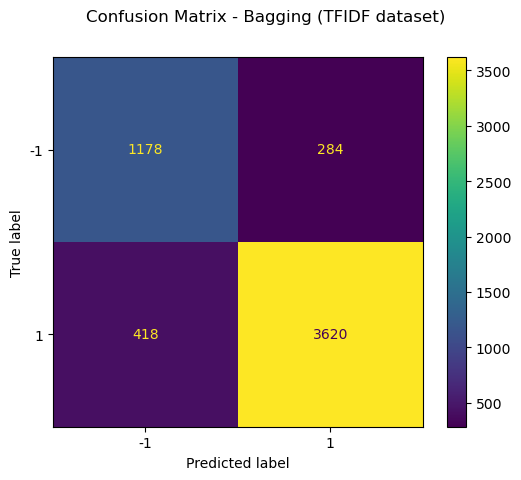

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay 

ConfusionMatrixDisplay.from_predictions(validation_rating, oneR_pred_tfidf).figure_.suptitle(f'Confusion Matrix - One R (TFIDF dataset)')
ConfusionMatrixDisplay.from_predictions(validation_rating, DT_pred_tfidf).figure_.suptitle(f'Confusion Matrix - Decision Tree (TFIDF dataset)')
ConfusionMatrixDisplay.from_predictions(validation_rating, bagging_pred_tfidf).figure_.suptitle(f'Confusion Matrix - Bagging (TFIDF dataset)')


**Feature selection - word embeddings**

In [12]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Normalize features
scaler = MinMaxScaler()
train_embedding_pos = scaler.fit_transform(train_embedding) 
validation_embedding_pos = scaler.transform(validation_embedding)

ks = [100, 200, 300, "all"] 
model = DT_model_tfidf
acc_list =[]

for k in ks:
    # Chi2
    x2 = SelectKBest(score_func = chi2, k = k)
    X_train_x2 = x2.fit_transform(train_embedding_pos, train_rating)
    X_test_x2 = x2.transform(validation_embedding_pos)

    # Mutual_info_classif
    mi = SelectKBest(score_func = mutual_info_classif, k = k)
    X_train_mi = mi.fit_transform(train_embedding_pos, train_rating) 
    X_test_mi = mi.transform(validation_embedding_pos)
    
    Xs = [(X_train_x2, X_test_x2), (X_train_mi, X_test_mi)] 
    X_names = ['x2', 'mi']
    acc = []
    # Evaluate model performance
    for X_name, X in zip(['x2', 'mi'], [(X_train_x2, X_test_x2), (X_train_mi, X_test_mi)]):
        X_train_t, X_test_t = X
        model.fit(X_train_t, train_rating) 
        accuracy = model.score(X_test_t, validation_rating)
        acc.append(accuracy)
        # Print the results
        print(f"Feature Selection Method: {X_name}, k: {k}, Accuracy: {accuracy:.5f}")
    acc_list.append(acc)
        

Feature Selection Method: x2, k: 100, Accuracy: 0.81309
Feature Selection Method: mi, k: 100, Accuracy: 0.80982
Feature Selection Method: x2, k: 200, Accuracy: 0.81400
Feature Selection Method: mi, k: 200, Accuracy: 0.80818
Feature Selection Method: x2, k: 300, Accuracy: 0.80673
Feature Selection Method: mi, k: 300, Accuracy: 0.80745
Feature Selection Method: x2, k: all, Accuracy: 0.80836
Feature Selection Method: mi, k: all, Accuracy: 0.80800


In [13]:
k_best = 0
acc_sum_max = -1
for i,k in zip(acc_list,ks):
    acc_sum = i[0]+i[1]
    if acc_sum > acc_sum_max:
        k_best = k
        acc_sum_max = acc_sum
    print(f"k: {k}, Sum: {i[0]+i[1]:.5f}")
    
print(f"Best choice is k: {k_best} (Sum: {acc_sum_max:.5f})")

k: 100, Sum: 1.62291
k: 200, Sum: 1.62218
k: 300, Sum: 1.61418
k: all, Sum: 1.61636
Best choice is k: 100 (Sum: 1.62291)


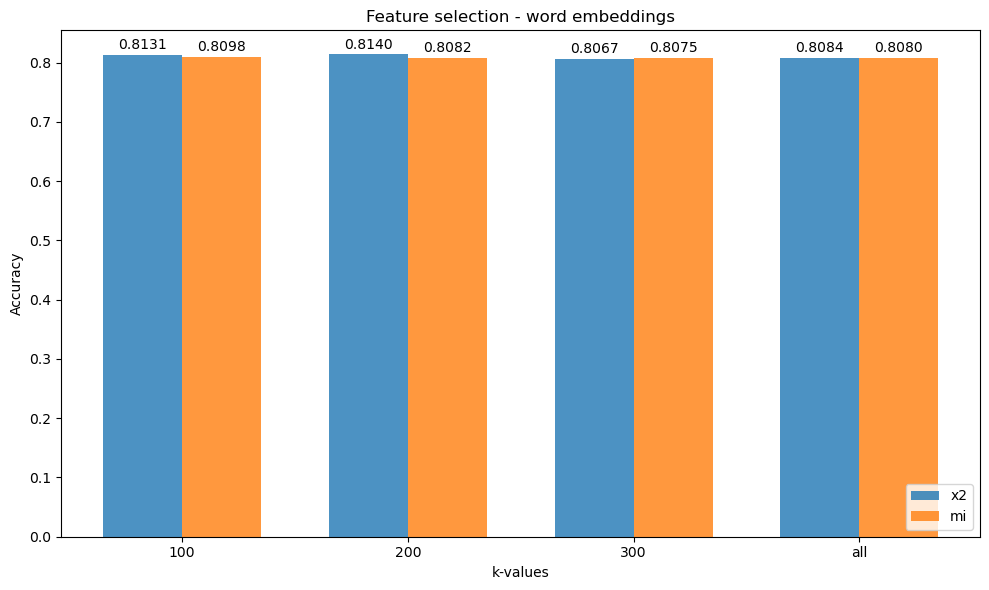

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
data = acc_list

labels = ks
categories = X_names

# Convert data to numpy array
data_array = np.array(data)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8

for i, category in enumerate(categories):
    plt.bar(np.arange(len(labels)) + i * bar_width, data_array[:, i], bar_width, alpha=opacity, label=category)

plt.xlabel('k-values')
plt.ylabel('Accuracy')
plt.title('Feature selection - word embeddings')
plt.xticks(np.arange(len(labels)) + bar_width / 2, labels)
plt.legend(loc='lower right')

for i in range(len(labels)):
    for j in range(len(categories)):
        plt.text(i + (j * bar_width), data_array[i, j] + 0.01, f'{data_array[i, j]:.4f}', ha='center')

plt.tight_layout()
plt.show()


**Feature selection - TFIDF**

In [15]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Normalize features
scaler = MinMaxScaler()
train_tfidf_pos = scaler.fit_transform(train_tfidf) 
validation_tfidf_pos = scaler.transform(validation_tfidf)

ks = [100, 200, 300, 400, "all"] 
model = DT_model_tfidf
tfidf_acc_list =[]

for k in ks:
    # Chi2
    x2 = SelectKBest(score_func = chi2, k = k)
    X_train_x2 = x2.fit_transform(train_tfidf_pos, train_rating)
    X_test_x2 = x2.transform(validation_tfidf_pos)

    # Mutual_info_classif
    mi = SelectKBest(score_func = mutual_info_classif, k = k)
    X_train_mi = mi.fit_transform(train_tfidf_pos, train_rating) 
    X_test_mi = mi.transform(validation_tfidf_pos)
    
    Xs = [(X_train_x2, X_test_x2), (X_train_mi, X_test_mi)] 
    X_names = ['x2', 'mi']
    acc = []
    # Evaluate model performance
    for X_name, X in zip(['x2', 'mi'], [(X_train_x2, X_test_x2), (X_train_mi, X_test_mi)]):
        X_train_t, X_test_t = X
        model.fit(X_train_t, train_rating) 
        accuracy = model.score(X_test_t, validation_rating)
        acc.append(accuracy)
        # Print the results
        print(f"Feature Selection Method: {X_name}, k: {k}, Accuracy: {accuracy:.5f}")
    tfidf_acc_list.append(acc)
        

Feature Selection Method: x2, k: 100, Accuracy: 0.83709
Feature Selection Method: mi, k: 100, Accuracy: 0.82945
Feature Selection Method: x2, k: 200, Accuracy: 0.84455
Feature Selection Method: mi, k: 200, Accuracy: 0.83364
Feature Selection Method: x2, k: 300, Accuracy: 0.83836
Feature Selection Method: mi, k: 300, Accuracy: 0.84000
Feature Selection Method: x2, k: 400, Accuracy: 0.83891
Feature Selection Method: mi, k: 400, Accuracy: 0.83818
Feature Selection Method: x2, k: all, Accuracy: 0.83964
Feature Selection Method: mi, k: all, Accuracy: 0.84182


In [16]:
k_best = 0
acc_sum_max = -1
for i,k in zip(tfidf_acc_list,ks):
    acc_sum = i[0]+i[1]
    if acc_sum > acc_sum_max:
        k_best = k
        acc_sum_max = acc_sum
    print(f"k: {k}, Sum: {i[0]+i[1]:.5f}")
    
print(f"Best choice is k: {k_best} (Sum: {acc_sum_max:.5f})")

k: 100, Sum: 1.66655
k: 200, Sum: 1.67818
k: 300, Sum: 1.67836
k: 400, Sum: 1.67709
k: all, Sum: 1.68145
Best choice is k: all (Sum: 1.68145)


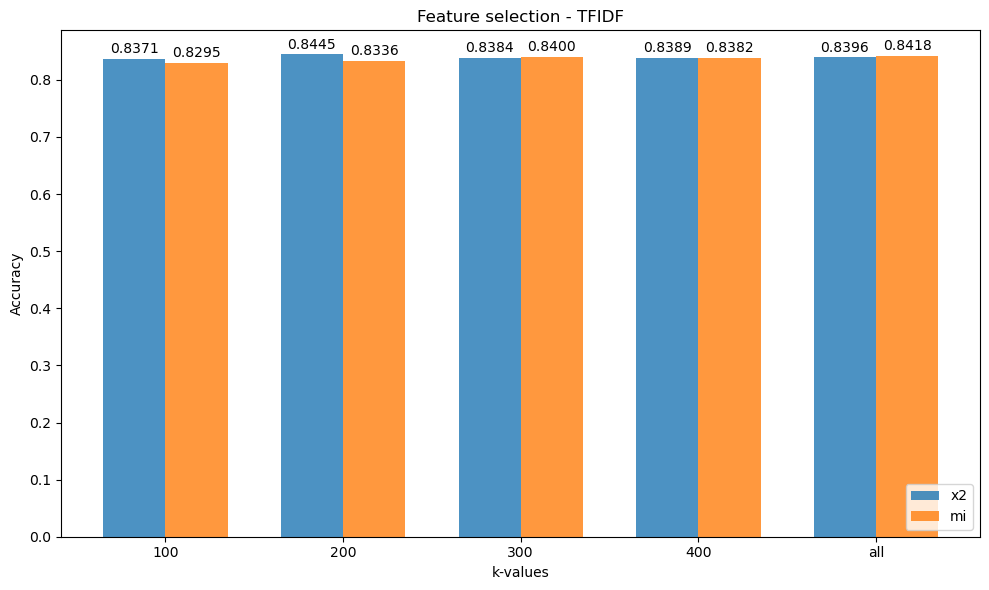

In [17]:
# Given data
data = tfidf_acc_list
labels = [100, 200, 300, 400, "all"] 
categories = X_names

# Convert data to numpy array
data_array = np.array(data)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8

for i, category in enumerate(categories):
    plt.bar(np.arange(len(labels)) + i * bar_width, data_array[:, i], bar_width, alpha=opacity, label=category)

plt.xlabel('k-values')
plt.ylabel('Accuracy')
plt.title('Feature selection - TFIDF')
plt.xticks(np.arange(len(labels)) + bar_width / 2, labels)
plt.legend(loc='lower right')

for i in range(len(labels)):
    for j in range(len(categories)):
        plt.text(i + (j * bar_width), data_array[i, j] + 0.01, f'{data_array[i, j]:.4f}', ha='center')

plt.tight_layout()
plt.show()


**Optimisation DT models by learning curve - word embeddings**

In [18]:
# validation accuracy
DT_acc_list_v = []
print('Validation word embeddings data:')
for i in range(1,76,5):
    clf = DecisionTreeClassifier(max_depth = i, max_features = "sqrt") 
    clf.fit(train_embedding,train_rating)
    score = clf.score(validation_embedding, validation_rating)
    DT_acc_list_v.append(score)
    print(f'Depth: {i} | ',f'Accuracy: {score}')
    
print('\n')

# training accuracy
DT_acc_list_t = []
print('Training word embeddings data:')
for i in range(1,76,5):
    clf = DecisionTreeClassifier(max_depth = i, max_features = "sqrt") 
    clf.fit(train_embedding,train_rating)
    score = clf.score(train_embedding, train_rating)
    DT_acc_list_t.append(score)
    print(f'Depth: {i} | ',f'Accuracy: {score}')

Validation word embeddings data:
Depth: 1 |  Accuracy: 0.7341818181818182
Depth: 6 |  Accuracy: 0.8034545454545454
Depth: 11 |  Accuracy: 0.814
Depth: 16 |  Accuracy: 0.8058181818181818
Depth: 21 |  Accuracy: 0.7909090909090909
Depth: 26 |  Accuracy: 0.7985454545454546
Depth: 31 |  Accuracy: 0.7949090909090909
Depth: 36 |  Accuracy: 0.7934545454545454
Depth: 41 |  Accuracy: 0.7950909090909091
Depth: 46 |  Accuracy: 0.7936363636363636
Depth: 51 |  Accuracy: 0.7963636363636364
Depth: 56 |  Accuracy: 0.7981818181818182
Depth: 61 |  Accuracy: 0.8047272727272727
Depth: 66 |  Accuracy: 0.8005454545454546
Depth: 71 |  Accuracy: 0.7992727272727272


Training word embeddings data:
Depth: 1 |  Accuracy: 0.7179499104713625
Depth: 6 |  Accuracy: 0.8151059228425924
Depth: 11 |  Accuracy: 0.9110992256354208
Depth: 16 |  Accuracy: 0.9703509057507615
Depth: 21 |  Accuracy: 0.9823965769830012
Depth: 26 |  Accuracy: 0.9850475548217567
Depth: 31 |  Accuracy: 0.9863730437411343
Depth: 36 |  Accuracy: 0.98

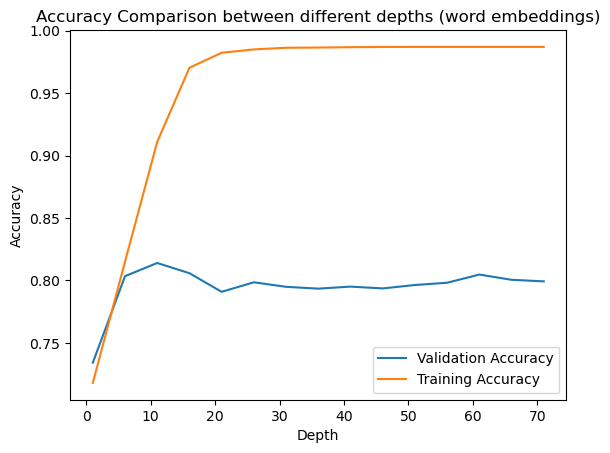

In [19]:
x = range(1, 76, 5)
plt.plot(x, DT_acc_list_v, label='Validation Accuracy')
plt.plot(x, DT_acc_list_t, label='Training Accuracy')

# Add labels and a legend
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between different depths (word embeddings)')
plt.legend()

# Show the plot
plt.show()

**Classifers Accuracy - word embeddings (depth = 11)**

In [21]:
# Decision tree Classifer - Model 1 - depth = 11
DT_model_embedding = DecisionTreeClassifier(max_depth = 11)
DT_model_embedding.fit(train_embedding,train_rating)
DT_acc_embedding = DT_model_embedding.score(validation_embedding, validation_rating) 
print('Decision tree accuracy:', DT_acc_embedding)

# Bagging Classifier - Model 2
bagging_model_embedding = BaggingClassifier(estimator = DT_model_embedding, n_estimators = 10, random_state = 42)
bagging_model_embedding.fit(train_embedding,train_rating)
bagging_acc_embedding = bagging_model_embedding.score(validation_embedding, validation_rating) 
print('Bagging accuracy:', bagging_acc_embedding)

Decision tree accuracy: 0.8292727272727273
Bagging accuracy: 0.868


**Optimisation DT models by learning curve - TFIDF**

In [22]:
# validation accuracy
DT_acc_list_v = []
print('Validation word TFIDF data:')
for i in range(1,76,5):
    clf = DecisionTreeClassifier(max_depth = i, max_features = "sqrt") 
    clf.fit(train_tfidf,train_rating)
    score = clf.score(validation_tfidf, validation_rating)
    DT_acc_list_v.append(score)
    print(f'Depth: {i} | ',f'Accuracy: {score}')
    
print('\n')

# training accuracy
DT_acc_list_t = []
print('Training word TFIDF data:')
for i in range(1,76,5):
    clf = DecisionTreeClassifier(max_depth = i, max_features = "sqrt") 
    clf.fit(train_tfidf,train_rating)
    score = clf.score(train_tfidf, train_rating)
    DT_acc_list_t.append(score)
    print(f'Depth: {i} | ',f'Accuracy: {score}')

Validation word TFIDF data:
Depth: 1 |  Accuracy: 0.7341818181818182
Depth: 6 |  Accuracy: 0.7923636363636364
Depth: 11 |  Accuracy: 0.8054545454545454
Depth: 16 |  Accuracy: 0.8058181818181818
Depth: 21 |  Accuracy: 0.8130909090909091
Depth: 26 |  Accuracy: 0.8178181818181818
Depth: 31 |  Accuracy: 0.8212727272727273
Depth: 36 |  Accuracy: 0.8114545454545454
Depth: 41 |  Accuracy: 0.8134545454545454
Depth: 46 |  Accuracy: 0.8250909090909091
Depth: 51 |  Accuracy: 0.8252727272727273
Depth: 56 |  Accuracy: 0.8252727272727273
Depth: 61 |  Accuracy: 0.8261818181818181
Depth: 66 |  Accuracy: 0.8178181818181818
Depth: 71 |  Accuracy: 0.8269090909090909


Training word TFIDF data:
Depth: 1 |  Accuracy: 0.7179499104713625
Depth: 6 |  Accuracy: 0.7248098969839314
Depth: 11 |  Accuracy: 0.8008278492198219
Depth: 16 |  Accuracy: 0.7906657675045927
Depth: 21 |  Accuracy: 0.8398948910541125
Depth: 26 |  Accuracy: 0.8569169592819106
Depth: 31 |  Accuracy: 0.878915424505267
Depth: 36 |  Accuracy: 0.

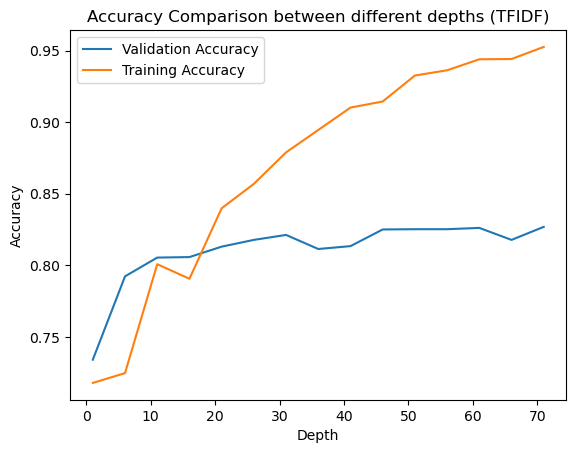

In [23]:
x = range(1, 76, 5)
plt.plot(x, DT_acc_list_v, label='Validation Accuracy')
plt.plot(x, DT_acc_list_t, label='Training Accuracy')

# Add labels and a legend
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between different depths (TFIDF)')
plt.legend()

# Show the plot
plt.show()

**Classifers Accuracy - TFIDF (depth = 46)**

In [24]:
# Decision tree Classifer - Model 1 - depth = 46
DT_model_tfidf = DecisionTreeClassifier(max_depth = 46)
DT_model_tfidf.fit(train_tfidf,train_rating)
DT_acc_tfidf = DT_model_tfidf.score(validation_tfidf, validation_rating) 
print('Decision tree accuracy:', DT_acc_tfidf)

# Bagging Classifier - Model 2
bagging_model_tfidf = BaggingClassifier(estimator = DT_model_tfidf, n_estimators = 10, random_state = 42)
bagging_model_tfidf.fit(train_tfidf,train_rating)
bagging_acc_tfidf = bagging_model_tfidf.score(validation_tfidf, validation_rating) 
print('Bagging accuracy:', bagging_acc_tfidf)

Decision tree accuracy: 0.838
Bagging accuracy: 0.8723636363636363


**Breakdown of validation data by gender**

In [ ]:
validation_all_f = (validation_all['dr_id_gender'] == 0) 
validation_all_m = (validation_all['dr_id_gender'] == 1) 
validation_all_u = (validation_all['dr_id_gender'] == 2)

validation_rating_f = validation_rating[validation_all_f] 
validation_rating_m = validation_rating[validation_all_m] 
validation_rating_u = validation_rating[validation_all_u]

# word embeddings
validation_embedding_f = validation_embedding[validation_all_f] 
validation_embedding_m = validation_embedding[validation_all_m] 
validation_embedding_u = validation_embedding[validation_all_u]

clfs = [oneR_model_embedding, DT_model_embedding, bagging_model_embedding]
validation_embedding_oneR_acc = []
validation_embedding_DT_acc = []
validation_embedding_Bagging_acc = []

print("Validation data with Words Embeddding")
for name, clf in zip(['One R','Decision tree','Bagging'],clfs):
    acc_clf = [clf.score(validation_embedding,validation_rating),clf.score(validation_embedding_f,validation_rating_f),clf.score(validation_embedding_m,validation_rating_m),clf.score(validation_embedding_u,validation_rating_u)]
    print(f" {name} model ")
    print(f" All gender | {acc_clf[0]:.5f}")
    print(f" Female     | {acc_clf[1]:.5f}")
    print(f" Male       | {acc_clf[2]:.5f}")
    print(f" Unknown    | {acc_clf[3]:.5f}")
    print("\n")
    if name == 'One R':
        validation_embedding_oneR_acc = acc_clf
    elif name == 'Decision tree':
        validation_embedding_DT_acc = acc_clf
    else:
        validation_embedding_Bagging_acc = acc_clf
        
validation_embedding_gender = [validation_embedding_oneR_acc,validation_embedding_DT_acc,validation_embedding_Bagging_acc]
    
# TFIDF
validation_tfidf_f = validation_tfidf[validation_all_f] 
validation_tfidf_m = validation_tfidf[validation_all_m] 
validation_tfidf_u = validation_tfidf[validation_all_u]

clfs = [oneR_model_tfidf, DT_model_tfidf, bagging_model_tfidf]
validation_tfidf_oneR_acc = []
validation_tfidf_DT_acc = []
validation_tfidf_Bagging_acc = []

print("Validation data with TFIDF")
for name, clf in zip(['One R','Decision tree','Bagging'],clfs):
    acc_clf = [clf.score(validation_tfidf,validation_rating),clf.score(validation_tfidf_f,validation_rating_f),clf.score(validation_tfidf_m,validation_rating_m),clf.score(validation_tfidf_u,validation_rating_u)]
    print(f" {name} model ")
    print(f" All gender | {acc_clf[0]:.5f}")
    print(f" Female     | {acc_clf[1]:.5f}")
    print(f" Male       | {acc_clf[2]:.5f}")
    print(f" Unknown    | {acc_clf[3]:.5f}")
    print("\n")
    if name == 'One R':
        validation_tfidf_oneR_acc = acc_clf
    elif name == 'Decision tree':
        validation_tfidf_DT_acc = acc_clf
    else:
        validation_tfidf_Bagging_acc = acc_clf
        
validation_tfidf_gender = [validation_tfidf_oneR_acc, validation_tfidf_DT_acc, validation_tfidf_Bagging_acc]

In [ ]:
(validation_all['dr_id_gender']).value_counts()

In [ ]:
# Given data
datas = [validation_embedding_gender, validation_tfidf_gender]
titles = ['validation dataset (word embedding)','validation dataset (TFIDF)']
for data, title in zip(datas, titles):
    
    labels = ['One R','Decision tree','Bagging']
    categories = ['All gender','Female','Male','Unknown']

    data_array = np.array(data)
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.2
    opacity = 0.8

    for i, category in enumerate(categories):
        plt.bar(np.arange(len(labels)) + i * bar_width, data_array[:, i], bar_width, alpha=opacity, label=category)

    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(f" Accuracies of models in {title} with different genders")
    plt.xticks(np.arange(len(labels)) + bar_width / 2, labels)
    plt.legend(loc='lower right')

    for i in range(len(labels)):
        for j in range(len(categories)):
            plt.text(i + (j * bar_width), data_array[i, j] + 0.01, f'{data_array[i, j]:.4f}', ha='center')

    plt.tight_layout()
    plt.show()

**Breakdown of test data by gender**

In [27]:
test_all_f = (test_all['dr_id_gender'] == 0) 
test_all_m = (test_all['dr_id_gender'] == 1) 
test_all_u = (test_all['dr_id_gender'] == 2)

# TFIDF
test_tfidf_f = test_tfidf[test_all_f] 
test_tfidf_m = test_tfidf[test_all_m] 
test_tfidf_u = test_tfidf[test_all_u]


clfs = [oneR_model_tfidf, DT_model_tfidf, bagging_model_tfidf]
test_tfidf_oneR_acc = []
test_tfidf_DT_acc = []
test_tfidf_Bagging_acc = []

print("test data with TFIDF")
for name, clf in zip(['One R','Decision tree','Bagging'],clfs):
    test_rating = clf.predict(test_tfidf)
    test_rating_f = test_rating[test_all_f] 
    test_rating_m = test_rating[test_all_m] 
    test_rating_u = test_rating[test_all_u]
    acc_clf = [clf.score(test_tfidf,test_rating),clf.score(test_tfidf_f,test_rating_f),clf.score(test_tfidf_m,test_rating_m),clf.score(test_tfidf_u,test_rating_u)]
    print(f" {name} model ")
    print(f" All gender | {acc_clf[0]:.5f}")
    print(f" Female     | {acc_clf[1]:.5f}")
    print(f" Male       | {acc_clf[2]:.5f}")
    print(f" Unknown    | {acc_clf[3]:.5f}")
    print("\n")
    if name == 'One R':
        test_tfidf_oneR_acc = acc_clf
    elif name == 'Decision tree':
        test_tfidf_DT_acc = acc_clf
    else:
        test_tfidf_Bagging_acc = acc_clf
        
test_tfidf_gender = [test_tfidf_oneR_acc, test_tfidf_DT_acc, test_tfidf_Bagging_acc]

test data with TFIDF
 One R model 
 All gender | 1.00000
 Female     | 1.00000
 Male       | 1.00000
 Unknown    | 1.00000


 Decision tree model 
 All gender | 1.00000
 Female     | 1.00000
 Male       | 1.00000
 Unknown    | 1.00000


 Bagging model 
 All gender | 1.00000
 Female     | 1.00000
 Male       | 1.00000
 Unknown    | 1.00000




In [ ]:
# Normalize features
scaler = MinMaxScaler()
train_embedding_pos = scaler.fit_transform(train_embedding) 
test_embedding_pos = scaler.transform(test_embedding)

k = 200
model = DT_model_embedding

# Chi2
x2 = SelectKBest(score_func = chi2, k = k)
X_train_x2 = x2.fit_transform(train_embedding_pos, train_rating)
X_test_x2 = x2.transform(test_embedding_pos)
model.fit(X_train_x2, train_rating) 
pred = model.predict(X_test_x2)
accuracy = model.score(X_test_x2, pred)
# Print the results
print(f"Feature Selection Method: chi2, k: {k}, Accuracy: {accuracy:.5f}")

In [ ]:
# Mutual_info_classif
mi = SelectKBest(score_func = mutual_info_classif, k = k)
X_train_mi = mi.fit_transform(train_embedding_pos, train_rating) 
X_test_mi = mi.transform(test_embedding_pos)

model.fit(X_train_mi, train_rating) 
pred = model.predict(X_test_mi)
accuracy = model.score(X_test_mi, pred)
# Print the results
print(f"Feature Selection Method: mi, k: {k}, Accuracy: {accuracy:.5f}")


In [34]:
test_all_f = (test_all['dr_id_gender'] == 0) 
test_all_m = (test_all['dr_id_gender'] == 1) 
test_all_u = (test_all['dr_id_gender'] == 2)

# embedding
test_embedding_f = test_embedding[test_all_f] 
test_embedding_m = test_embedding[test_all_m] 
test_embedding_u = test_embedding[test_all_u]

clfs = [oneR_model_embedding, DT_model_embedding, bagging_model_embedding]
test_embedding_oneR_acc = []
test_embedding_DT_acc = []
test_embedding_Bagging_acc = []

print("test data with word embeddings")
for name, clf in zip(['One R','Decision tree','Bagging'],clfs):
    clf.fit(train_embdding, train_rating)
    test_rating = clf.predict(test_embedding)
    test_rating_f = test_rating[test_all_f] 
    test_rating_m = test_rating[test_all_m] 
    test_rating_u = test_rating[test_all_u]
    acc_clf = [clf.score(test_embedding,test_rating),clf.score(test_embedding_f,test_rating_f),clf.score(test_embedding_m,test_rating_m),clf.score(test_embedding_u,test_rating_u)]
    print(f" {name} model ")
    print(f" All gender | {acc_clf[0]:.5f}")
    print(f" Female     | {acc_clf[1]:.5f}")
    print(f" Male       | {acc_clf[2]:.5f}")
    print(f" Unknown    | {acc_clf[3]:.5f}")
    print("\n")
    if name == 'One R':
        test_embedding_oneR_acc = acc_clf
    elif name == 'Decision tree':
        test_embedding_DT_acc = acc_clf
    else:
        test_embedding_Bagging_acc = acc_clf
        
test_embedding_gender = [test_embedding_oneR_acc, test_embedding_DT_acc, test_embedding_Bagging_acc]

test data with word embeddings


NameError: name 'train_embdding' is not defined

In [ ]:
# Given data
datas = [test_embedding_gender, test_tfidf_gender]
titles = ['test dataset (word embedding)','test dataset (TFIDF)']
for data, title in zip(datas, titles):
    
    labels = ['One R','Decision tree','Bagging']
    categories = ['All gender','Female','Male','Unknown']

    data_array = np.array(data)
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.2
    opacity = 0.8

    for i, category in enumerate(categories):
        plt.bar(np.arange(len(labels)) + i * bar_width, data_array[:, i], bar_width, alpha=opacity, label=category)

    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(f" Accuracies of models in {title} with different genders")
    plt.xticks(np.arange(len(labels)) + bar_width / 2, labels)
    plt.legend(loc='lower right')

    for i in range(len(labels)):
        for j in range(len(categories)):
            plt.text(i + (j * bar_width), data_array[i, j] + 0.01, f'{data_array[i, j]:.4f}', ha='center')

    plt.tight_layout()
    plt.show()